In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
train = pd.read_csv('data/credit_train.csv.zip', encoding='cp1251', delimiter=';', index_col='client_id')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
client_id,,,,,,,,,,,,,,
1,M,48,MAR,UMN,"59998,00",10,1.6,"0,770249",GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
2,F,28,MAR,UMN,"10889,00",6,1.1,"0,248514",GRD,МОСКВА,43000.0,2.0,0.0,0
3,M,32,MAR,SPC,"10728,00",12,1.1,"0,459589",SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
4,F,27,DIV,SPC,"12009,09",12,1.1,"0,362536",GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
5,M,45,MAR,SPC,"16908,89",10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


In [3]:
test = pd.read_csv('data/credit_test.csv.zip', encoding='cp1251', delimiter=';', index_col='client_id')
test.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count
client_id,,,,,,,,,,,,,
170747,F,48,MAR,UMN,"16558,00",10,1.10,"0,370409",GRD,ХАКАСИЯ РЕСП,34000,2.0,0.0
170748,M,29,MAR,SPC,"7028,72",6,1.40,"0,377281",SCH,ОБЛ КЕМЕРОВСКАЯ,19000,3.0,0.0
170749,F,20,UNM,SPC,"13019,00",10,1.60,"0,538515",SCH,ОБЛ БЕЛГОРОДСКАЯ,25000,1.0,0.0
170750,F,41,MAR,SPC,"9379,00",10,1.10,"0,482520",GRD,ОБЛ ИРКУТСКАЯ,30000,0.0,0.0
170751,F,31,MAR,SPC,"13990,00",6,1.43,"0,485914",GRD,ОБЛ КИРОВСКАЯ,20000,2.0,0.0


In [4]:
all_data = pd.concat([train, test])
all_data.describe()

,age,credit_count,credit_month,monthly_income,open_account_flg,overdue_credit_count,tariff_id
count,262686.000000,248753.000000,262686.000000,262685.000000,170746.000000,248753.000000,262686.000000
mean,36.484628,2.107552,10.980954,40118.979904,0.176028,0.045997,1.323828
std,10.534205,1.774774,3.541896,24907.802693,0.380845,0.211371,0.235725
min,18.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.000000,10.000000,25000.000000,0.000000,0.000000,1.100000
50%,34.000000,2.000000,10.000000,35000.000000,0.000000,0.000000,1.320000
75%,43.000000,3.000000,12.000000,50000.000000,0.000000,0.000000,1.600000
max,71.000000,22.000000,36.000000,950000.000000,1.000000,3.000000,1.960000


In [5]:
all_data.head()

,age,credit_count,credit_month,credit_sum,education,gender,job_position,living_region,marital_status,monthly_income,open_account_flg,overdue_credit_count,score_shk,tariff_id
client_id,,,,,,,,,,,,,,
1,48,1.0,10,"59998,00",GRD,M,UMN,КРАСНОДАРСКИЙ КРАЙ,MAR,30000.0,0.0,1.0,"0,770249",1.6
2,28,2.0,6,"10889,00",GRD,F,UMN,МОСКВА,MAR,43000.0,0.0,0.0,"0,248514",1.1
3,32,5.0,12,"10728,00",SCH,M,SPC,ОБЛ САРАТОВСКАЯ,MAR,23000.0,0.0,0.0,"0,459589",1.1
4,27,2.0,12,"12009,09",GRD,F,SPC,ОБЛ ВОЛГОГРАДСКАЯ,DIV,17000.0,0.0,0.0,"0,362536",1.1
5,45,1.0,10,"16908,89",SCH,M,SPC,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,MAR,25000.0,0.0,0.0,"0,421385",1.1


In [6]:
def fix_numbers(data):
    # Как оказалось в данных проблемы с форматом чисел. Вместо точки использовалась запятая, поэтому получили мы строки а не float.
    data['credit_sum'] = pd.to_numeric(data['credit_sum'].str.replace(',', '.'))
    data['score_shk'] = pd.to_numeric(data['score_shk'].str.replace(',', '.'))
    # ИД тарифа оказалось число типа float, переделаем в строку
    data['tariff_id'] = data['tariff_id'].astype(str).str.replace('.', ',')

In [7]:
all_data['monthly_income'] = all_data['monthly_income'].fillna(35000) # медиана 50%
fix_numbers(all_data)
all_data.head()

,age,credit_count,credit_month,credit_sum,education,gender,job_position,living_region,marital_status,monthly_income,open_account_flg,overdue_credit_count,score_shk,tariff_id
client_id,,,,,,,,,,,,,,
1,48,1.0,10,59998.00,GRD,M,UMN,КРАСНОДАРСКИЙ КРАЙ,MAR,30000.0,0.0,1.0,0.770249,"1,6"
2,28,2.0,6,10889.00,GRD,F,UMN,МОСКВА,MAR,43000.0,0.0,0.0,0.248514,"1,1"
3,32,5.0,12,10728.00,SCH,M,SPC,ОБЛ САРАТОВСКАЯ,MAR,23000.0,0.0,0.0,0.459589,"1,1"
4,27,2.0,12,12009.09,GRD,F,SPC,ОБЛ ВОЛГОГРАДСКАЯ,DIV,17000.0,0.0,0.0,0.362536,"1,1"
5,45,1.0,10,16908.89,SCH,M,SPC,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,MAR,25000.0,0.0,0.0,0.421385,"1,1"


In [8]:
# данные, которые заполнены не полностью. Заменить 0 все численные. Москвой жилой район.
def null_data_count(data):
    return [(i,data['age'].count() - v) for i, v in data.count().iteritems() if v < data['age'].count()]
print(null_data_count(test))
print(null_data_count(train))
print(null_data_count(all_data))

[('living_region', 116), ('credit_count', 4703), ('overdue_credit_count', 4703)]
[('living_region', 192), ('monthly_income', 1), ('credit_count', 9230), ('overdue_credit_count', 9230)]
[('credit_count', 13933), ('living_region', 308), ('open_account_flg', 91940), ('overdue_credit_count', 13933)]


# Заполнение городов
Как видно, в данных есть пропуски города в котором живет клиент. Возможно эти данные весьма критичны, хорошо было бы уметь их восстанавливать. Возможно пропущенный регион проживания означает, что человек вообще не из России, а из другой страны. Но в тестовых данных слишком много пропусков. Тут варианта три - либо мы создадим регион "Банановая республика", либо выставим всем Москву или попробуем предсказать.

Кажется, что на город может влиять только возраст, размер дохода и кредита, уровень обрзования, волшебный параметр score_shk. Кол-во кредитов тоже являетс пропущенным параметром, поэтому думаю можно на него заюить.

In [9]:
data_dirty = all_data[['gender','age','marital_status','job_position','credit_sum','credit_month','tariff_id','score_shk','education','living_region','monthly_income']]
data_dirty.head()
print(null_data_count(data_dirty))

[('living_region', 308)]


In [10]:
data_dirty['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

Как видно, данные о регионе очень грязные. Я решил почистить их, чтобы обл. и область и обл всё было про одно - про область какого-то города. Я даже хотел все города заменить на области, но подумал что тут может быть некоторый скрытый смысл - мол в городах у людей зп выше чем в области. С другой стороны учитывая что данные грязные, там наверное замес из областей и городов.

In [11]:
regions = pd.read_csv('data/location_dict.csv', index_col='living_region')
print(len(regions.index.unique()))
print(len(regions['living_region_clean'].unique()))
np.sort(regions['living_region_clean'].unique())

317
83


array(['АДЫГЕЯ', 'АЛТАЙСКИЙ', 'АМУРСКАЯ', 'АРХАНГЕЛЬСКАЯ', 'АСТРАХАНСКАЯ',
       'БАШКОРТОСТАН', 'БЕЛГОРОДСКАЯ', 'БРЯНСКАЯ', 'БУРЯТИЯ',
       'ВЛАДИМИРСКАЯ', 'ВОЛГОГРАДСКАЯ', 'ВОЛОГОДСКАЯ', 'ВОРОНЕЖСКАЯ',
       'ДАГЕСТАН', 'ЕВРЕЙСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ИВАНОВСКАЯ', 'ИНГУШЕТИЯ',
       'ИРКУТСКАЯ', 'КАБАРДИНО-БАЛКАРСКАЯ', 'КАЛИНИНГРАДСКАЯ', 'КАЛМЫКИЯ',
       'КАЛУЖСКАЯ', 'КАМЧАТСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРЕЛИЯ',
       'КЕМЕРОВСКАЯ', 'КИРОВСКАЯ', 'КОМИ', 'КОСТРОМСКАЯ', 'КРАСНОДАРСКИЙ',
       'КРАСНОЯРСКИЙ', 'КУРГАНСКАЯ', 'КУРСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'ЛИПЕЦКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'МОРДОВИЯ', 'МОСКОВСКАЯ',
       'МУРМАНСКАЯ', 'НЕНЕЦКИЙ', 'НИЖЕГОРОДСКАЯ', 'НОВГОРОДСКАЯ',
       'НОВОСИБИРСКАЯ', 'ОМСКАЯ', 'ОРЕНБУРГСКАЯ', 'ОРЛОВСКАЯ', 'ОСЕТИЯ',
       'ПЕНЗЕНСКАЯ', 'ПЕРМСКИЙ', 'ПРИМОРСКИЙ', 'ПСКОВСКАЯ', 'РОСТОВСКАЯ',
       'РЯЗАНСКАЯ', 'САМАРСКАЯ', 'САРАТОВСКАЯ', 'САХА', 'САХАЛИНСКАЯ',
       'СВЕРДЛОВСКАЯ', 'СЕВЕРНАЯОСЕТИЯ', 'СМОЛЕНСКАЯ', 'СТАВРОПОЛЬСКИЙ',
     

In [12]:
data_dirty[data_dirty['living_region'].isnull()].head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income
client_id,,,,,,,,,,,
579,M,32,MAR,SPC,8543.0,12,"1,1",0.501101,SCH,NaN,17000.0
920,M,40,MAR,SPC,29218.0,12,"1,1",0.428999,SCH,NaN,20000.0
1922,F,32,MAR,SPC,31258.0,12,"1,1",0.481957,GRD,NaN,24000.0
2803,M,26,MAR,SPC,22736.0,24,"1,1",0.332486,UGR,NaN,35000.0
5634,M,36,UNM,BIS,67869.0,12,"1,1",0.342860,GRD,NaN,70000.0


In [13]:
print(data_dirty.shape)
data = pd.merge(data_dirty, regions, how='left', left_on='living_region', right_index=True).drop(['living_region'], axis=1)
data.rename(columns={'living_region_clean': 'living_region'}, inplace=True)
print(data.shape)
data[data['living_region'].isnull()].head()

(262686, 11)
(262686, 13)


,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,living_region,lon,lat
client_id,,,,,,,,,,,,,
579,M,32,MAR,SPC,8543.0,12,"1,1",0.501101,SCH,17000.0,NaN,NaN,NaN
920,M,40,MAR,SPC,29218.0,12,"1,1",0.428999,SCH,20000.0,NaN,NaN,NaN
1922,F,32,MAR,SPC,31258.0,12,"1,1",0.481957,GRD,24000.0,NaN,NaN,NaN
2803,M,26,MAR,SPC,22736.0,24,"1,1",0.332486,UGR,35000.0,NaN,NaN,NaN
5634,M,36,UNM,BIS,67869.0,12,"1,1",0.342860,GRD,70000.0,NaN,NaN,NaN


МОСКОВСКАЯ              33886
ЛЕНИНГРАДСКАЯ           18039
КРАСНОДАРСКИЙ           12882
ТАТАРСТАН               11914
СВЕРДЛОВСКАЯ            11219
БАШКОРТОСТАН             9794
САМАРСКАЯ                7963
ЧЕЛЯБИНСКАЯ              7942
СТАВРОПОЛЬСКИЙ           7044
ХАНТЫ-МАНСИЙСКИЙ         6805
ИРКУТСКАЯ                6760
РОСТОВСКАЯ               6739
НИЖЕГОРОДСКАЯ            5733
ПЕРМСКИЙ                 5478
КРАСНОЯРСКИЙ             4810
КЕМЕРОВСКАЯ              4417
АСТРАХАНСКАЯ             4264
ВОЛОГОДСКАЯ              3953
ТЮМЕНСКАЯ                3737
ВОЛГОГРАДСКАЯ            3609
САРАТОВСКАЯ              3507
НОВОСИБИРСКАЯ            3319
ЯМАЛО-НЕНЕЦКИЙ           2981
КОМИ                     2799
САХА                     2779
АРХАНГЕЛЬСКАЯ            2644
ВОРОНЕЖСКАЯ              2626
БУРЯТИЯ                  2540
ТВЕРСКАЯ                 2384
ХАБАРОВСКИЙ              2355
                        ...  
КАЛИНИНГРАДСКАЯ          1130
БЕЛГОРОДСКАЯ             1110
МОРДОВИЯ  

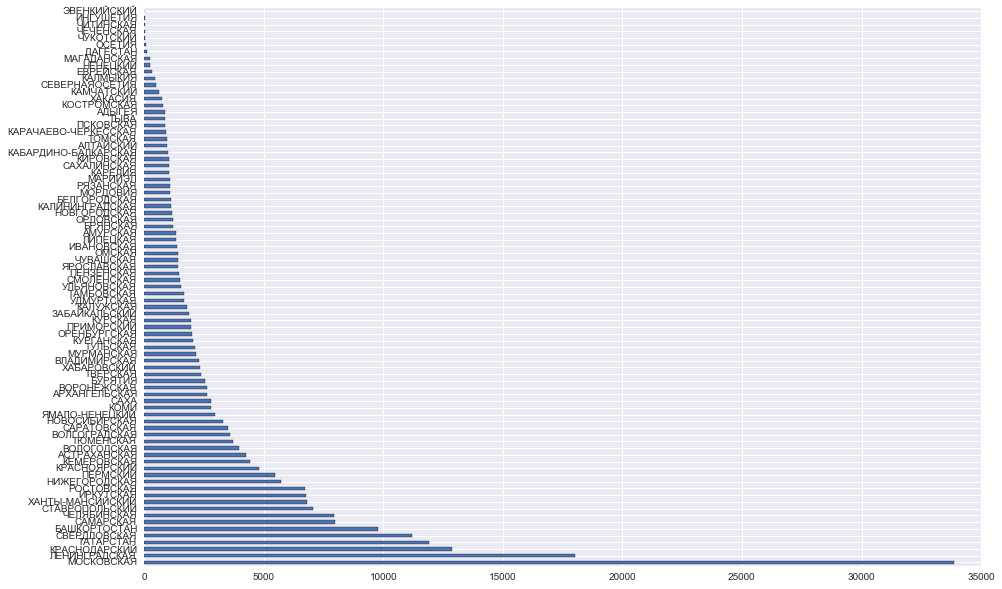

In [14]:
print(data['living_region'].value_counts())
data['living_region'].value_counts().plot(kind="barh")

In [15]:
from sklearn.preprocessing import LabelEncoder
d = pd.DataFrame(index=data.index)
for cat in ['gender', 'marital_status', 'job_position', 'tariff_id', 'education']:
    d[cat] = LabelEncoder().fit_transform(data[cat])
for cat in ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income']:
    d[cat] = data[cat]
d['living_region'] = data['living_region']
d.head()

,gender,marital_status,job_position,tariff_id,education,age,credit_sum,credit_month,score_shk,monthly_income,living_region
client_id,,,,,,,,,,,
1,1,2,14,26,1,48,59998.00,10,0.770249,30000.0,КРАСНОДАРСКИЙ
2,0,2,14,1,1,28,10889.00,6,0.248514,43000.0,МОСКОВСКАЯ
3,1,2,13,1,3,32,10728.00,12,0.459589,23000.0,САРАТОВСКАЯ
4,0,1,13,1,1,27,12009.09,12,0.362536,17000.0,ВОЛГОГРАДСКАЯ
5,1,2,13,1,3,45,16908.89,10,0.421385,25000.0,ЧЕЛЯБИНСКАЯ


In [16]:
train_city = d[d['living_region'].isnull() == False]
test_city = d[d['living_region'].isnull()].drop(['living_region'], axis=1)
test_city.head()

,gender,marital_status,job_position,tariff_id,education,age,credit_sum,credit_month,score_shk,monthly_income
client_id,,,,,,,,,,
579,1,2,13,1,3,32,8543.0,12,0.501101,17000.0
920,1,2,13,1,3,40,29218.0,12,0.428999,20000.0
1922,0,2,13,1,1,32,31258.0,12,0.481957,24000.0
2803,1,2,13,1,4,26,22736.0,24,0.332486,35000.0
5634,1,3,1,1,1,36,67869.0,12,0.342860,70000.0


In [17]:
from sklearn.preprocessing import LabelEncoder
x_city = train_city.drop(['living_region'], axis=1)
y_city = pd.DataFrame(index=train_city.index)
le = LabelEncoder()
le.fit(train_city['living_region'])
y_city['living_region'] = le.transform(train_city['living_region'])
y_city = y_city['living_region']

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
clf = KNeighborsClassifier()
pred = cross_val_predict(clf, x_city, y_city, cv=kfold)
print(classification_report(y_city, pred))

             precision    recall  f1-score   support

          0       0.01      0.03      0.01       872
          1       0.01      0.05      0.02       972
          2       0.01      0.04      0.02      1327
          3       0.02      0.06      0.03      2644
          4       0.03      0.11      0.05      4264
          5       0.05      0.14      0.07      9794
          6       0.01      0.03      0.02      1110
          7       0.02      0.04      0.02      1224
          8       0.01      0.03      0.02      2540
          9       0.02      0.06      0.03      2295
         10       0.02      0.04      0.03      3609
         11       0.03      0.05      0.04      3953
         12       0.02      0.04      0.03      2626
         13       0.01      0.02      0.01       105
         14       0.01      0.01      0.01       327
         15       0.02      0.03      0.02      1877
         16       0.01      0.02      0.01      1383
         17       0.04      0.08      0.05   

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [436]:
clf = KNeighborsClassifier()
clf.fit(x_city, y_city)
le.inverse_transform(clf.predict(test_city))

array(['ТАТАРСТАН', 'АМУРСКАЯ', 'БЕЛГОРОДСКАЯ', 'БАШКОРТОСТАН',
       'КРАСНОДАРСКИЙ', 'КРАСНОДАРСКИЙ', 'АСТРАХАНСКАЯ', 'БАШКОРТОСТАН',
       'БАШКОРТОСТАН', 'КАЛИНИНГРАДСКАЯ', 'АРХАНГЕЛЬСКАЯ', 'ТВЕРСКАЯ',
       'АМУРСКАЯ', 'КИРОВСКАЯ', 'МОСКОВСКАЯ', 'БРЯНСКАЯ', 'БЕЛГОРОДСКАЯ',
       'МОСКОВСКАЯ', 'МОСКОВСКАЯ', 'ИРКУТСКАЯ', 'БАШКОРТОСТАН',
       'ИРКУТСКАЯ', 'КРАСНОДАРСКИЙ', 'КЕМЕРОВСКАЯ', 'АСТРАХАНСКАЯ',
       'АСТРАХАНСКАЯ', 'МОСКОВСКАЯ', 'АРХАНГЕЛЬСКАЯ', 'МОСКОВСКАЯ',
       'КРАСНОЯРСКИЙ', 'МОСКОВСКАЯ', 'ВОЛГОГРАДСКАЯ', 'ЕВРЕЙСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'МОСКОВСКАЯ', 'САРАТОВСКАЯ', 'БАШКОРТОСТАН',
       'НИЖЕГОРОДСКАЯ', 'НОВОСИБИРСКАЯ', 'ВОЛГОГРАДСКАЯ', 'МОСКОВСКАЯ',
       'КРАСНОДАРСКИЙ', 'МОСКОВСКАЯ', 'КРАСНОДАРСКИЙ', 'МОСКОВСКАЯ',
       'ИВАНОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'КРАСНОДАРСКИЙ', 'ИРКУТСКАЯ',
       'АМУРСКАЯ', 'ОРЕНБУРГСКАЯ', 'КРАСНОЯРСКИЙ', 'МОСКОВСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ', 'ВОЛГОГРАДСКАЯ', 'СВЕРДЛОВСКАЯ',
       'САМАРСКАЯ', 'АДЫГЕЯ', 'ХАНТЫ

In [468]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
pred = cross_val_predict(clf, x_city, y_city, cv=kfold)
print(classification_report(y_city, pred))

             precision    recall  f1-score   support

          0       0.04      0.07      0.05       872
          1       0.04      0.07      0.05       972
          2       0.05      0.08      0.06      1327
          3       0.05      0.06      0.05      2644
          4       0.08      0.12      0.10      4264
          5       0.09      0.14      0.11      9794
          6       0.05      0.06      0.05      1110
          7       0.06      0.08      0.07      1224
          8       0.04      0.04      0.04      2540
          9       0.07      0.08      0.07      2295
         10       0.07      0.08      0.07      3609
         11       0.10      0.10      0.10      3953
         12       0.08      0.08      0.08      2626
         13       0.03      0.02      0.02       105
         14       0.07      0.06      0.06       327
         15       0.07      0.07      0.07      1877
         16       0.07      0.07      0.07      1383
         17       0.00      0.00      0.00   

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [469]:
clf = RandomForestClassifier()
clf.fit(x_city, y_city)
pred = clf.predict(test_city)
le.inverse_transform(pred)

array(['САМАРСКАЯ', 'АСТРАХАНСКАЯ', 'БАШКОРТОСТАН', 'ТАТАРСТАН',
       'КРАСНОДАРСКИЙ', 'КРАСНОДАРСКИЙ', 'ТАТАРСТАН', 'САРАТОВСКАЯ',
       'БРЯНСКАЯ', 'ВОЛГОГРАДСКАЯ', 'КРАСНОДАРСКИЙ', 'КЕМЕРОВСКАЯ',
       'ИРКУТСКАЯ', 'НОВОСИБИРСКАЯ', 'КАРЕЛИЯ', 'ЛЕНИНГРАДСКАЯ',
       'МОСКОВСКАЯ', 'МОСКОВСКАЯ', 'МОСКОВСКАЯ', 'ТУЛЬСКАЯ',
       'ВОЛГОГРАДСКАЯ', 'МОСКОВСКАЯ', 'МОСКОВСКАЯ', 'КЕМЕРОВСКАЯ',
       'НИЖЕГОРОДСКАЯ', 'АМУРСКАЯ', 'ТАМБОВСКАЯ', 'БАШКОРТОСТАН',
       'МОСКОВСКАЯ', 'АМУРСКАЯ', 'МОСКОВСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'КАМЧАТСКИЙ', 'КРАСНОЯРСКИЙ', 'МОСКОВСКАЯ', 'СВЕРДЛОВСКАЯ',
       'ОМСКАЯ', 'МОСКОВСКАЯ', 'ВЛАДИМИРСКАЯ', 'РЯЗАНСКАЯ', 'ВЛАДИМИРСКАЯ',
       'МОСКОВСКАЯ', 'МОСКОВСКАЯ', 'АДЫГЕЯ', 'МОСКОВСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'БУРЯТИЯ', 'ХАНТЫ-МАНСИЙСКИЙ', 'ВОЛГОГРАДСКАЯ', 'РОСТОВСКАЯ',
       'МОСКОВСКАЯ', 'ЛЕНИНГРАДСКАЯ', 'ЛЕНИНГРАДСКАЯ', 'САРАТОВСКАЯ',
       'КУРСКАЯ', 'ВЛАДИМИРСКАЯ', 'СВЕРДЛОВСКАЯ', 'КРАСНОДАРСКИЙ',
       'ЧЕЛЯБИНСКАЯ', 'ТАТАРСТАН', 'БАШКОРТОСТАН',

In [472]:
city_pred = pd.DataFrame(index=test_city.index)
city_pred['living_region'] = le.inverse_transform(pred)
city_pred.head()

,living_region
client_id,
579,САМАРСКАЯ
920,АСТРАХАНСКАЯ
1922,БАШКОРТОСТАН
2803,ТАТАРСТАН
5634,КРАСНОДАРСКИЙ


In [473]:
city = pd.DataFrame(index=train_city.index)
city['living_region'] = train_city['living_region']
city.head()

,living_region
client_id,
1,КРАСНОДАРСКИЙ
2,МОСКОВСКАЯ
3,САРАТОВСКАЯ
4,ВОЛГОГРАДСКАЯ
5,ЧЕЛЯБИНСКАЯ


In [477]:
all_city = pd.concat([city, city_pred])
all_city.describe()

,living_region
count,262686
unique,83
top,МОСКОВСКАЯ
freq,33957


In [482]:
all_data_full = pd.concat([all_data.drop(['living_region'], axis = 1), all_city], axis=1)
all_data_full.head()

,age,credit_count,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,open_account_flg,overdue_credit_count,score_shk,tariff_id,living_region
client_id,,,,,,,,,,,,,,
1,48,1.0,10,59998.00,GRD,M,UMN,MAR,30000.0,0.0,1.0,0.770249,"1,6",КРАСНОДАРСКИЙ
2,28,2.0,6,10889.00,GRD,F,UMN,MAR,43000.0,0.0,0.0,0.248514,"1,1",МОСКОВСКАЯ
3,32,5.0,12,10728.00,SCH,M,SPC,MAR,23000.0,0.0,0.0,0.459589,"1,1",САРАТОВСКАЯ
4,27,2.0,12,12009.09,GRD,F,SPC,DIV,17000.0,0.0,0.0,0.362536,"1,1",ВОЛГОГРАДСКАЯ
5,45,1.0,10,16908.89,SCH,M,SPC,MAR,25000.0,0.0,0.0,0.421385,"1,1",ЧЕЛЯБИНСКАЯ


In [508]:
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame(index=all_data_full.index)
for cat in ['gender', 'marital_status', 'job_position', 'tariff_id', 'education', 'living_region']:
    data[cat] = LabelEncoder().fit_transform(all_data_full[cat])
for cat in ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']:
    data[cat] = all_data_full[cat]
data.head()

,gender,marital_status,job_position,tariff_id,education,living_region,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count
client_id,,,,,,,,,,,,,
1,1,2,14,26,1,30,48,59998.00,10,0.770249,30000.0,1.0,1.0
2,0,2,14,1,1,39,28,10889.00,6,0.248514,43000.0,2.0,0.0
3,1,2,13,1,3,56,32,10728.00,12,0.459589,23000.0,5.0,0.0
4,0,1,13,1,1,10,27,12009.09,12,0.362536,17000.0,2.0,0.0
5,1,2,13,1,3,75,45,16908.89,10,0.421385,25000.0,1.0,0.0


In [544]:
data = pd.get_dummies(data=all_data_full, columns=['gender', 'marital_status', 'job_position', 'tariff_id', 'education', 'living_region']).drop(['open_account_flg'], axis=1)

In [557]:
train_credit = data[data['credit_count'].isnull() == False]
test_credit = data[data['credit_count'].isnull()].drop(['credit_count', 'overdue_credit_count'], axis = 1)

In [547]:
x_train_credit = train_credit.drop(['credit_count', 'overdue_credit_count'], axis = 1)

y_train_credit_count = train_credit['credit_count']
y_train_credit_overdue = train_credit['overdue_credit_count']

In [548]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def testRegression(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    return r2_score(y_test, pred)

In [549]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

clfs = [DummyRegressor(), LinearRegression(fit_intercept=True, normalize=True), GradientBoostingRegressor(), AdaBoostRegressor(), RandomForestRegressor(), KNeighborsRegressor()]
for clf in clfs:
    print(testRegression(clf, x_train_credit, y_train_credit_count))

-3.70078126566e-06
0.059340945454
0.0797289647216
-1.45344903134
0.0127327125533
-0.147592329413


In [550]:
clfs = [DummyRegressor(), LinearRegression(fit_intercept=True, normalize=True), GradientBoostingRegressor(), AdaBoostRegressor(), RandomForestRegressor(), KNeighborsRegressor()]
for clf in clfs:
    print(testRegression(clf, x_train_credit, y_train_credit_overdue))

-1.83636911228e-05
0.0449909175046
0.0554116038338
-5.90325222335
-0.0235613155918
-0.185523102861


Во всяком случае предсказивать линейной регрессией или градиентным бустингом чуть-чуть выгоднее чем брать тупо среденее значение. Возможно это даже поможет слегка улучшить показатели.

In [554]:
def predict(clf, X, y, test_x):
    clf.fit(X, y)
    return clf.predict(test_x)

In [556]:
pred_credit_overdue = predict(GradientBoostingRegressor(), x_train_credit, y_train_credit_overdue, test_credit)
print(pred_credit_overdue)
pred_credit_count = predict(GradientBoostingRegressor(), x_train_credit, y_train_credit_count, test_credit)
print(pred_credit_count)

[ 0.0029507   0.20771554  0.14475761 ...,  0.03038522  0.01026472
  0.08199804]
[ 1.24123548  2.18758043  2.44596992 ...,  1.2284791   2.35093271
  1.5161844 ]


In [563]:
credit_pred = pd.DataFrame(index=test_credit.index)
credit_pred['overdue_credit_count'] = pred_credit_overdue
credit_pred['credit_count'] = pred_credit_count
credit_pred[credit_pred < 0] = 0
credit_pred.head()

,overdue_credit_count,credit_count
client_id,,
26,0.002951,1.241235
51,0.207716,2.187580
53,0.144758,2.445970
73,0.000000,0.956553
75,0.061570,1.230658


In [560]:
credit = pd.DataFrame(index=train_credit.index)
credit['overdue_credit_count'] = train_credit['overdue_credit_count']
credit['credit_count'] = train_credit['credit_count']
credit.head()

,overdue_credit_count,credit_count
client_id,,
1,1.0,1.0
2,0.0,2.0
3,0.0,5.0
4,0.0,2.0
5,0.0,1.0


In [564]:
all_credit = pd.concat([credit, credit_pred])
all_credit.describe()

,overdue_credit_count,credit_count
count,262686.000000,262686.000000
mean,0.045930,2.075395
std,0.206014,1.736291
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,3.000000,22.000000


In [567]:
entire_all_data_full = pd.concat([all_data_full.drop(['overdue_credit_count', 'credit_count'], axis = 1),all_credit], axis = 1)
entire_all_data_full.head()

,age,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,open_account_flg,score_shk,tariff_id,living_region,overdue_credit_count,credit_count
client_id,,,,,,,,,,,,,,
1,48,10,59998.00,GRD,M,UMN,MAR,30000.0,0.0,0.770249,"1,6",КРАСНОДАРСКИЙ,1.0,1.0
2,28,6,10889.00,GRD,F,UMN,MAR,43000.0,0.0,0.248514,"1,1",МОСКОВСКАЯ,0.0,2.0
3,32,12,10728.00,SCH,M,SPC,MAR,23000.0,0.0,0.459589,"1,1",САРАТОВСКАЯ,0.0,5.0
4,27,12,12009.09,GRD,F,SPC,DIV,17000.0,0.0,0.362536,"1,1",ВОЛГОГРАДСКАЯ,0.0,2.0
5,45,10,16908.89,SCH,M,SPC,MAR,25000.0,0.0,0.421385,"1,1",ЧЕЛЯБИНСКАЯ,0.0,1.0


In [568]:
entire_all_data_full.count()

age                     262686
credit_month            262686
credit_sum              262686
education               262686
gender                  262686
job_position            262686
marital_status          262686
monthly_income          262686
open_account_flg        170746
score_shk               262686
tariff_id               262686
living_region           262686
overdue_credit_count    262686
credit_count            262686
dtype: int64

In [569]:
entire_all_data_full.ix[train.index].to_csv('data/credit_train_clean.csv.zip', compression='gzip')
entire_all_data_full.ix[test.index].to_csv('data/credit_test_clean.csv.zip', compression='gzip')